In [2]:
import numpy as np
import pandas as pd

# Normalizing data
from sklearn import preprocessing

# Generating fingerprints
from rdkit import Chem
from rdkit.Chem import AllChem

#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Visualisation
import seaborn as sns
import matplotlib.pylab as plt

#Splitting data into train and test
from sklearn.model_selection import train_test_split

#Removing variance
from sklearn.feature_selection import VarianceThreshold

#Cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
import statistics

# confusion matrix, AUC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

#Random Forest
from sklearn.ensemble import RandomForestClassifier

RDKit WARNING: [12:23:31] Enabling RDKit 2019.09.3 jupyter extensions


In [3]:
df = pd.read_csv("final_df_descriptos.csv")
df.head()

,Standardised_Smiles,AM1_E,AM1_Eele,AM1_HF,AM1_HOMO,AM1_IP,AM1_LUMO,AM1_dipole,ASA,ASA+,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,weinerPath,weinerPol,zagreb,Target
0,Oc1c(Cl)cc(Cl)cc1Sc1cc(Cl)cc(Cl)c1O,-91061.594,-490900.38,-54.180599,-9.08072,9.08072,-0.86114,1.984315,493.96982,116.66142,...,59.125,3.750,0.75,0.000,0.000,0.0,688,30,98,0
1,CCCCCC1C(=O)CCC1CC(=O)O,-64010.746,-377504.44,-181.891950,-10.37975,10.37975,0.76110,1.842890,458.93463,320.75201,...,31.375,6.625,2.75,0.625,0.125,0.0,400,17,68,0
2,Cc1cc(=O)n(-c2ccccc2)n1C,-53151.840,-302296.66,64.051399,-8.76044,8.76044,-0.17180,4.432582,392.48480,232.39806,...,16.000,0.000,0.00,0.000,0.000,0.0,284,20,72,0
3,O=C(C=CC=Cc1ccc2c(c1)OCO2)N1CCCCC1,-83131.195,-527420.63,-51.748039,-8.66869,8.66869,-0.80507,2.895411,548.17822,370.79236,...,20.000,0.000,0.00,0.000,0.000,0.0,1131,27,106,0
4,O=c1ccc2cc(OC3OC(CO)C(O)C(O)C3O)c(O)cc2o1,-115882.230,-774507.50,-348.088130,-9.29644,9.29644,-1.18028,4.948146,522.75287,310.44724,...,94.625,18.375,4.75,0.625,0.000,0.0,1339,42,128,0


In [4]:
# showing the number of compounds where target = 0 and target = 1
print("Inactive Compounds:{}".format(df[(df["Target"]==0)].shape[0]))
print("Active Compounds:{}".format(df[(df["Target"]==1)].shape[0]))

Inactive Compounds:1126
Active Compounds:304


In [5]:
# creating the X and y variables, where X = features and y = target (1 or 0)
X = df.iloc[:, :-1] #X = all rows and columns except the last column
y = df.iloc[:, -1] #y = only the last column (target)

In [6]:
df.drop(columns = 'Standardised_Smiles', inplace = True)

In [7]:
df.head()

,AM1_E,AM1_Eele,AM1_HF,AM1_HOMO,AM1_IP,AM1_LUMO,AM1_dipole,ASA,ASA+,ASA-,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,weinerPath,weinerPol,zagreb,Target
0,-91061.594,-490900.38,-54.180599,-9.08072,9.08072,-0.86114,1.984315,493.96982,116.66142,377.30841,...,59.125,3.750,0.75,0.000,0.000,0.0,688,30,98,0
1,-64010.746,-377504.44,-181.891950,-10.37975,10.37975,0.76110,1.842890,458.93463,320.75201,138.18260,...,31.375,6.625,2.75,0.625,0.125,0.0,400,17,68,0
2,-53151.840,-302296.66,64.051399,-8.76044,8.76044,-0.17180,4.432582,392.48480,232.39806,160.08675,...,16.000,0.000,0.00,0.000,0.000,0.0,284,20,72,0
3,-83131.195,-527420.63,-51.748039,-8.66869,8.66869,-0.80507,2.895411,548.17822,370.79236,177.38583,...,20.000,0.000,0.00,0.000,0.000,0.0,1131,27,106,0
4,-115882.230,-774507.50,-348.088130,-9.29644,9.29644,-1.18028,4.948146,522.75287,310.44724,212.30565,...,94.625,18.375,4.75,0.625,0.000,0.0,1339,42,128,0


In [8]:
# trying to normalize the data, need to redo this!!!!!
#standardized = preprocessing.normalize(df)
#NDF = pd.DataFrame(normalized)
#NDF.head()

In [9]:
# creating the X and y variables, where X = features and y = target (1 or 0)
X = df.iloc[:, :-1] #X = all rows and columns except the last column
y = df.iloc[:, -1] #y = only the last column (target)

In [10]:
descriptors_std = StandardScaler().fit_transform(X)

# Chemical Space Visualisation

In [11]:
pca = PCA(n_components=2)
print(X.shape)
res = pca.fit_transform(descriptors_std)
print(res.shape)

(1430, 354)
(1430, 2)


In [12]:
principal = pd.DataFrame(data = res, columns = ['PC1', 'PC2'])

finalPCA = pd.concat([principal,  df[['Target']]], axis = 1)
display(finalPCA.head())

,PC1,PC2,Target
0,-2.815871,-3.917015,0
1,-4.978448,-0.271778,0
2,-8.871983,-4.891291,0
3,-1.270698,-6.003349,0
4,3.756103,10.166345,0


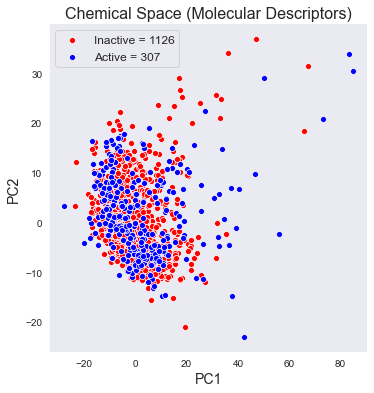

In [13]:
# visualising PC1 vs PC2

sns.set_style('dark')

colours = 'red', 'blue'
ax = sns.pairplot(data = finalPCA, hue = 'Target', x_vars = ['PC1'], y_vars = ['PC2'], palette = colours, height = 5)

plt.xlabel('PC1', fontsize = 14)
plt.ylabel('PC2', fontsize = 14)
plt.title('Chemical Space (Molecular Descriptors)', fontsize = 16)
ax._legend.remove()
plt.legend(['Inactive = 1126','Active = 307'], fontsize = 12)

In [17]:
# need to sort out the above pairplot, this should look similar to that of 1024 and 2048 bit

# Data Pre-Processing

In [14]:
# splitting MD database in 20% test set and 80% training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print('X_train: {}'.format(X_train.shape))
print('y_train: {}'.format(y_train.shape))
print()
print('X_test: {}'.format(X_test.shape))
print('y_test: {}'.format(y_test.shape))

X_train: (1144, 354)
y_train: (1144,)

X_test: (286, 354)
y_test: (286,)


In [15]:
# removing features with low variance

def get_variance(df, threshold):
    sel = VarianceThreshold(threshold = (threshold))
    var = pd.DataFrame(data = sel.fit_transform(df))
    features = sel.get_support(indices = True)
    var.columns = features
    return (var)

In [17]:
# creating subdatabases with a variance of 0%, 5% and 10%

X1_var_0 = get_variance(X_train, 1*(1-1))
X1_var_5 = get_variance(X_train, 0.95*(1-0.95))
X1_var_10 = get_variance(X_train, 0.90*(1-0.90))

print('Features with 0% variance: {}'.format(X1_var_0.shape))
print('Features with 5% variance: {}'.format(X1_var_5.shape))
print('Features with 10% variance: {}'.format(X1_var_10.shape))

Features with 0% variance: (1144, 349)
Features with 5% variance: (1144, 289)
Features with 10% variance: (1144, 277)


# Feature Selection

In [25]:
# cross validation comparing the performances of X_var_0, X_var_5 and X_var_10 on the training set

def cross_val (num_splits, n_estimators, X, y, random_seed):
    sfk = StratifiedKFold(n_splits = num_splits, shuffle = True, random_state = random_seed)
    rf = RandomForestClassifier(n_estimators = n_estimators, random_state = random_seed)
    rf_cv_score = cross_val_score(rf, X, y, cv = sfk, scoring = 'roc_auc')
    
    return (statistics.median(rf_cv_score), statistics.stdev(rf_cv_score))

In [26]:
# creating a list of feature selection values forX_var_0, X_var_5 and X_var_10

feature_selection = []
for subdatabase in (X1_var_0, X1_var_5, X1_var_10):
    feature_selection.append(cross_val(10, 100, subdatabase , y_train, 1))

In [27]:
# converting list into a comprehendable dataframe

feature_selection_df = pd.DataFrame(data = feature_selection, index=['X1_var_0', 'X1_var_5', 'X1_var_10'])
feature_selection_df = feature_selection_df.round(decimals=3)*100
feature_selection_df.columns = ["Median AUC score (%)", "Standard Deviation"]
display(feature_selection_df)

,Median AUC score (%),Standard Deviation
X1_var_0,81.8,3.5
X1_var_5,80.0,3.0
X1_var_10,81.1,4.1


# Model Performance on test set

In [59]:
X1_var_5.head()

,0,1,2,3,4,5,6,7,8,9,...,344,345,346,347,348,349,350,351,352,353
0,-70031.422,-387641.470,-180.316760,-10.61314,10.61314,0.64940,4.497112,439.43134,257.63486,181.79648,...,254.875,61.125,19.625,7.875,3.125,0.500,0.00,301.0,19.0,64.0
1,-69014.172,-440947.560,-49.411839,-9.74762,9.74762,-1.27981,8.700996,485.10208,316.48801,168.61406,...,270.375,40.125,1.375,0.000,0.000,0.000,0.00,522.0,26.0,86.0
2,-28489.328,-95632.563,-73.911453,-10.41703,10.41703,-0.51742,0.253346,247.10480,134.76329,112.34151,...,34.250,0.750,0.000,0.000,0.000,0.000,0.00,29.0,4.0,22.0
3,-189000.110,-1971959.000,-574.062380,-10.21639,10.21639,0.97128,3.908933,756.36237,533.67212,222.69025,...,532.000,146.500,24.875,7.000,2.375,0.000,0.00,5312.0,94.0,244.0
4,-105973.440,-780325.560,78.114128,-8.76269,8.76269,-0.93122,6.715635,650.54266,419.99295,219.64091,...,525.750,119.500,29.375,15.625,9.125,4.625,2.75,2093.0,44.0,146.0


In [58]:
# select features with best performance on train set, in this case X_var_95
best_features = X1_var_5

# select the same features for the test set as X_var_95
columns_name= best_features.columns
X_test_features = X_test[columns_name[:]]
display(X_test_features.head())
print(X_test_features.shape)

KeyError: "None of [Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,\n            ...\n            344, 345, 346, 347, 348, 349, 350, 351, 352, 353],\n           dtype='int64', length=289)] are in the [columns]"

In [60]:
best_features.head()

,0,1,2,3,4,5,6,7,8,9,...,344,345,346,347,348,349,350,351,352,353
0,-70031.422,-387641.470,-180.316760,-10.61314,10.61314,0.64940,4.497112,439.43134,257.63486,181.79648,...,254.875,61.125,19.625,7.875,3.125,0.500,0.00,301.0,19.0,64.0
1,-69014.172,-440947.560,-49.411839,-9.74762,9.74762,-1.27981,8.700996,485.10208,316.48801,168.61406,...,270.375,40.125,1.375,0.000,0.000,0.000,0.00,522.0,26.0,86.0
2,-28489.328,-95632.563,-73.911453,-10.41703,10.41703,-0.51742,0.253346,247.10480,134.76329,112.34151,...,34.250,0.750,0.000,0.000,0.000,0.000,0.00,29.0,4.0,22.0
3,-189000.110,-1971959.000,-574.062380,-10.21639,10.21639,0.97128,3.908933,756.36237,533.67212,222.69025,...,532.000,146.500,24.875,7.000,2.375,0.000,0.00,5312.0,94.0,244.0
4,-105973.440,-780325.560,78.114128,-8.76269,8.76269,-0.93122,6.715635,650.54266,419.99295,219.64091,...,525.750,119.500,29.375,15.625,9.125,4.625,2.75,2093.0,44.0,146.0


In [62]:
best_features.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            344, 345, 346, 347, 348, 349, 350, 351, 352, 353],
           dtype='int64', length=289)